# Setup

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split


Import from google drive

In [7]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive')
data_csv = pd.read_csv("weatherHistory.csv")



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Data Processing
The model will try to predict the features (the list classes[ ] below) with the parameters provided (the list para[ ] below)

There are 27 classes in total

In [8]:
# para = ['precipitation', 'temp_max','temp_min','wind']
para = [	'Temperature (C)',	'Apparent Temperature (C)',	'Humidity',	'Wind Speed (km/h)',	'Wind Bearing (degrees)',	'Visibility (km)',	'Pressure (millibars)']

classes = ['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
       'Breezy and Mostly Cloudy', 'Breezy and Overcast',
       'Breezy and Partly Cloudy', 'Clear',
       'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry',
       'Dry and Mostly Cloudy', 'Dry and Partly Cloudy', 'Foggy',
       'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
       'Overcast', 'Partly Cloudy', 'Rain', 'Windy', 'Windy and Dry',
       'Windy and Foggy', 'Windy and Mostly Cloudy', 'Windy and Overcast',
       'Windy and Partly Cloudy']

df = data_csv

# These two parameters have little impact on prediction, so just throw them away
df.drop(['Daily Summary','Loud Cover'],axis=1,inplace=True)

# Drop out unknown data
df.dropna(inplace=True)

for i in para:
  df[i] = df[i] / df[i].max()

# weather_dic = {'drizzle':0, 'sun':1,'rain':2,'fog':3,'snow':4}

# Y = []
# for i in df['weather']:
#   Y.append(weather_dic[i])


Use labelEncoder to transform the text data to numerical data

In [9]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Precip Type']=le.fit_transform(df['Precip Type'])
df['Summary']=le.fit_transform(df['Summary'])


Standarize input features

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns[2:]] = scaler.fit_transform(df[df.columns[2:]])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,19,-0.354531,-0.257951,-0.324102,0.792748,0.478964,0.591157,1.309107,0.102152
1,2006-04-01 01:00:00.000 +0200,19,-0.354531,-0.270141,-0.339134,0.639470,0.499902,0.665655,1.309107,0.106415
2,2006-04-01 02:00:00.000 +0200,17,-0.354531,-0.267819,-0.138532,0.792748,-0.993620,0.153478,1.100806,0.109058
3,2006-04-01 03:00:00.000 +0200,19,-0.354531,-0.381594,-0.458873,0.486192,0.476638,0.758778,1.309107,0.113066
4,2006-04-01 04:00:00.000 +0200,17,-0.354531,-0.332833,-0.362460,0.486192,0.034630,0.665655,1.309107,0.113919


In [291]:
# df.pop('weather')
# df.pop('date')
# X = df
# trainX = df.sample(frac=0.9, random_state=2)
# testX = df.drop(train.index)
# Y_onehot = tf.keras.utils.to_categorical(Y)

In [292]:
# x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)
# y_train_onehot = tf.keras.utils.to_categorical(y_train)
# y_test_onehot = tf.keras.utils.to_categorical(y_test)

# Split data for train and test

In [11]:
Y = df.iloc[:,1] 
X = df.iloc[:,2:] 

x_train = []
x_test = []
y_train = []
y_test = []
y_train_onehot = []
y_test_onehot = []
while True:
  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1, random_state = 1)
  y_train_onehot = tf.keras.utils.to_categorical(y_train)
  y_test_onehot = tf.keras.utils.to_categorical(y_test)
  if len(y_train_onehot[0]) is 27 & len(y_test_onehot[0]) is 27:
      break

# Build Model

In [35]:
def build_model_sequential(denseList, inputShape):
  model = tf.keras.models.Sequential()
  if len(denseList) is 1:
    model.add(tf.keras.layers.Dense(denseList[0], activation='softmax',input_shape=inputShape)) 
  else:
    model.add(tf.keras.layers.Dense(denseList[0], activation='relu',input_shape=inputShape)) 
    for i in denseList[1:-1]:
        model.add(tf.keras.layers.Dense(i, activation='relu')) 
    model.add(tf.keras.layers.Dense(denseList[-1], activation='softmax')) 

  model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
  return model




# Model 1
Single-layer: linear regression

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   

 dense_134 (Dense)           (None, 27)                243       
                                       
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________
epochs:20 - loss: 0.0328 - accuracy: 0.2947
[0.03282402828335762, 0.29466333985328674]

In [32]:
# model_lr = tf.keras.models.Sequential()
# model_lr.add(tf.keras.layers.Dense(27, activation='softmax',input_shape=(8))) # 27 classes, so cannot change
denselist = [27]
inputShape = (8,)
lr_model = build_model_sequential(denselist,inputShape)

In [69]:
# compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [23]:
lr_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 27)                243       
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = lr_model.fit(
    x_train,
    y_train_onehot,
    validation_split=0.2,
    epochs=20
    )

Epoch 1/20
2159/2159 [==============================] - 7s 3ms/step - loss: 0.0363 - accuracy: 0.0533 - val_loss: 0.0363 - val_accuracy: 0.0563
Epoch 2/20
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0362 - accuracy: 0.0627 - val_loss: 0.0362 - val_accuracy: 0.0670
Epoch 3/20
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0361 - accuracy: 0.0737 - val_loss: 0.0361 - val_accuracy: 0.0797
Epoch 4/20
2159/2159 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.0877 - val_loss: 0.0359 - val_accuracy: 0.0950
Epoch 5/20
2159/2159 [==============================] - 5s 2ms/step - loss: 0.0358 - accuracy: 0.1043 - val_loss: 0.0357 - val_accuracy: 0.1129
Epoch 6/20
2159/2159 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.1239 - val_loss: 0.0356 - val_accuracy: 0.1323
Epoch 7/20
2159/2159 [==============================] - 5s 2ms/step - loss: 0.0354 - accuracy: 0.1414 - val_loss: 0.0354 - val_accuracy:

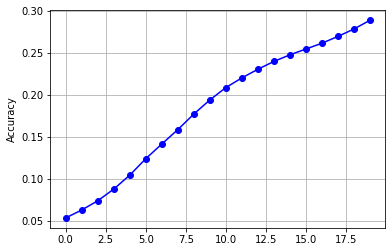

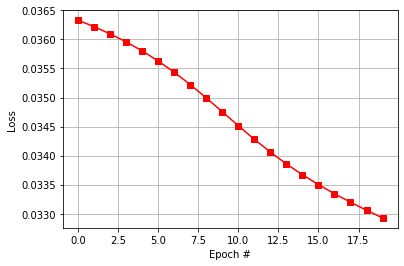

In [25]:
plt.figure(1)
plt.plot(history.history['accuracy'], 'b-o')
plt.grid(True)
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(history.history['loss'],'r-s')
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.show()

In [26]:
lr_model.evaluate(x_test, y_test_onehot)

300/300 [==============================] - 0s 1ms/step - loss: 0.0328 - accuracy: 0.2947


[0.03282402828335762, 0.29466333985328674]

# Model 2
Multi-layer ANN

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   

 flatten_8 (Flatten)         (None, 8)                 0         
                                                                 
 dense_35 (Dense)            (None, 128)               1152      
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 27)                891       
                                                                 

Total params: 12,379
Trainable params: 12,379
Non-trainable params: 0
_________________________________________________________________

epochs: 20 - loss: 0.0280 - accuracy: 0.3760
[0.02802494913339615, 0.37596413493156433]


In [36]:
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(512, activation='relu',input_shape=(8)))
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(27, activation='softmax')) # 27 classes

denselist = [512,128, 64, 27]
inputShape = (8,)
lg_model = build_model_sequential(denselist,inputShape)

In [37]:
# lg_model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [38]:
lg_model.build(input_shape=(None, 8))

lg_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               4608      
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 27)                1755      
                                                                 
Total params: 80,283
Trainable params: 80,283
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = lg_model.fit(
    x_train,
    y_train_onehot,
    validation_split=0.2,
    epochs=20
    )

Epoch 1/20
2159/2159 [==============================] - 10s 4ms/step - loss: 0.0357 - accuracy: 4.9223e-04 - val_loss: 0.0357 - val_accuracy: 0.0013
Epoch 2/20
2159/2159 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.0104 - val_loss: 0.0356 - val_accuracy: 0.0299
Epoch 3/20
2159/2159 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.0773 - val_loss: 0.0354 - val_accuracy: 0.1379
Epoch 4/20
2159/2159 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.2087 - val_loss: 0.0353 - val_accuracy: 0.2679
Epoch 5/20
2159/2159 [==============================] - 5s 2ms/step - loss: 0.0353 - accuracy: 0.3010 - val_loss: 0.0352 - val_accuracy: 0.3168
Epoch 6/20
2159/2159 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.3266 - val_loss: 0.0350 - val_accuracy: 0.3227
Epoch 7/20
2159/2159 [==============================] - 6s 3ms/step - loss: 0.0349 - accuracy: 0.3292 - val_loss: 0.0348 - val_accu

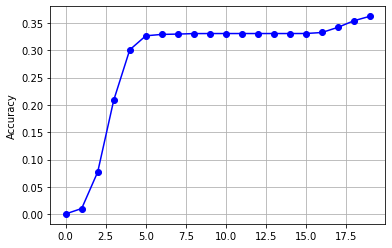

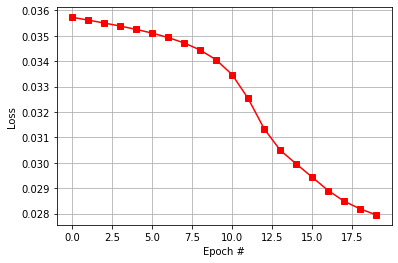

In [40]:
plt.figure(1)
plt.plot(history.history['accuracy'], 'b-o')
plt.grid(True)
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(history.history['loss'],'r-s')
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.show()

In [41]:
lg_model.evaluate(x_test, y_test_onehot)

300/300 [==============================] - 1s 3ms/step - loss: 0.0278 - accuracy: 0.3674


[0.02778540551662445, 0.3674171268939972]

#Model 3
Random Forest

(just copy & paste from other developers)

Accuracy: 0.5933917031478008

In [66]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(max_depth=32,n_estimators=120,random_state=1)
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5933917031478008
